In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
#device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [3]:
device

'mps'

In [4]:
weight = 0.3
bias = 0.9
n_samples = 100
splitting_ratio = .8
X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight*X + bias


In [5]:
X.shape

torch.Size([100, 1])

In [6]:
y.shape

torch.Size([100, 1])

In [7]:
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [8]:
#spliting the data into train_test
split_value = int(len(X)*splitting_ratio)
X_train, X_test = X[:split_value],X[split_value:]
y_train, y_test = y[:split_value],y[split_value:]

In [9]:
X_train.shape, y_train.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

In [10]:
#visualization
def plotting(X_train, X_test, y_train, y_test, prediction = None):
    plt.figure(figsize = (12,7))
    plt.scatter(X_train, y_train, s=40, c = 'g',marker = 'x')
    plt.scatter(X_test, y_test, s=40, c = 'r',marker = 'x')

    if prediction is not None:
        plt.scatter(X_test, prediction, s=40, c = 'b',marker = 'x')


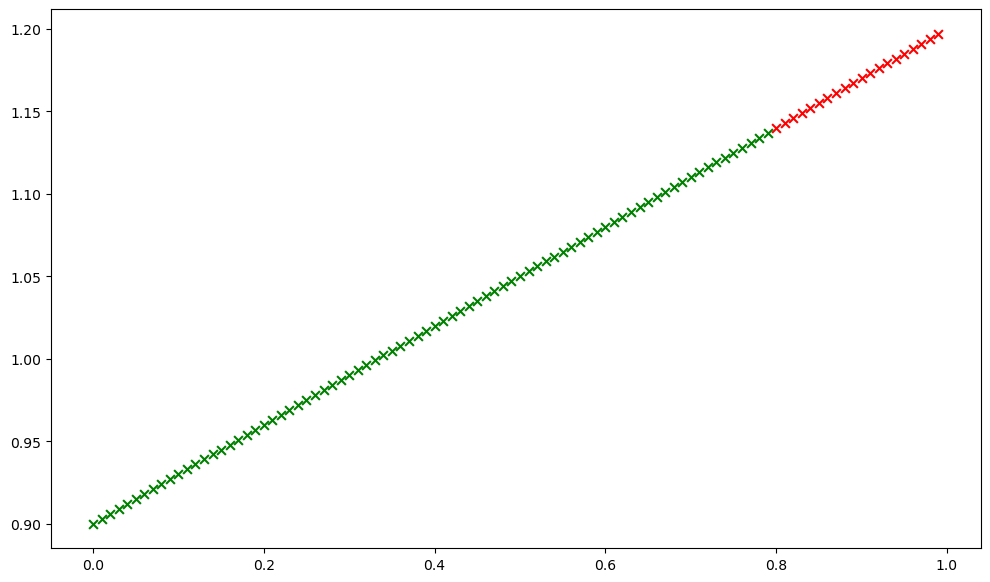

In [11]:
plot = plotting(X_train,X_test, y_train, y_test)

## Model Creation

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=1,
                            out_features = 5)
        self.l2 = nn.Linear(in_features = 5,
                            out_features = 1)
    def forward(self, x):
        return self.l2(self.l1(x))
        

In [13]:
torch.manual_seed(42)
model_1  = LinearRegressionModel().to(device)

In [14]:
model_1.state_dict()

OrderedDict([('l1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191]], device='mps:0')),
             ('l1.bias',
              tensor([ 0.2018, -0.4869,  0.5873,  0.8815, -0.7336], device='mps:0')),
             ('l2.weight',
              tensor([[0.3887, 0.0837, 0.3304, 0.0606, 0.2156]], device='mps:0')),
             ('l2.bias', tensor([-0.0631], device='mps:0'))])

In [15]:
#initial prediction
y_init  = model_1(X_test.to(device))

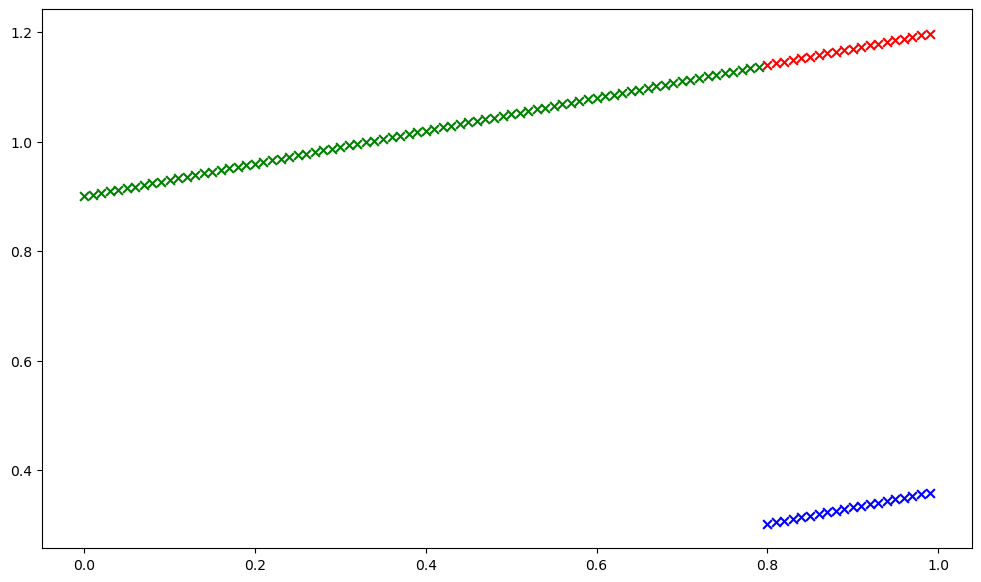

In [16]:
plot_2 = plotting(X_train,X_test, y_train, y_test,prediction = y_init.cpu().detach().numpy())

## Loss and Optimizer

In [17]:
#loss function 
loss_fn = nn.L1Loss()


#optimizer 
optimizer = torch.optim.Adam(model_1.parameters(),
                            lr = 0.01)


In [22]:
#now the train and test loop
#train loop 
torch.manual_seed(42)
X_train , X_test = X_train.to(device),X_test.to(device)
y_train, y_test = y_train.to(device),y_test.to(device)

epochs = 600
for epoch in range(epochs):
    model_1.train()
    train_pred = model_1(X_train)
    #calculate the loss
    train_loss = loss_fn(train_pred,y_train)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()


    ## perform testing every 20 epochs
    if epoch%20==0:
        with torch.no_grad():
            model_1.eval()
        
            test_pred = model_1(X_test)
            test_loss = loss_fn(test_pred,y_test)
            
            
        print(f" Epoch: {epoch} | Train_loss: {train_loss:.3f} | Test_loss: {test_loss:.3f}")
            
        
            


 Epoch: 0 | Train_loss: 0.009 | Test_loss: 0.012
 Epoch: 20 | Train_loss: 0.005 | Test_loss: 0.009
 Epoch: 40 | Train_loss: 0.004 | Test_loss: 0.017
 Epoch: 60 | Train_loss: 0.012 | Test_loss: 0.011
 Epoch: 80 | Train_loss: 0.001 | Test_loss: 0.005
 Epoch: 100 | Train_loss: 0.009 | Test_loss: 0.013
 Epoch: 120 | Train_loss: 0.004 | Test_loss: 0.004
 Epoch: 140 | Train_loss: 0.005 | Test_loss: 0.002
 Epoch: 160 | Train_loss: 0.004 | Test_loss: 0.002
 Epoch: 180 | Train_loss: 0.003 | Test_loss: 0.001
 Epoch: 200 | Train_loss: 0.004 | Test_loss: 0.001
 Epoch: 220 | Train_loss: 0.003 | Test_loss: 0.003
 Epoch: 240 | Train_loss: 0.003 | Test_loss: 0.002
 Epoch: 260 | Train_loss: 0.004 | Test_loss: 0.001
 Epoch: 280 | Train_loss: 0.003 | Test_loss: 0.001
 Epoch: 300 | Train_loss: 0.002 | Test_loss: 0.010
 Epoch: 320 | Train_loss: 0.011 | Test_loss: 0.005
 Epoch: 340 | Train_loss: 0.004 | Test_loss: 0.009
 Epoch: 360 | Train_loss: 0.003 | Test_loss: 0.004
 Epoch: 380 | Train_loss: 0.008 | Tes

In [23]:
with torch.no_grad():
    final_pred = model_1(X_test)


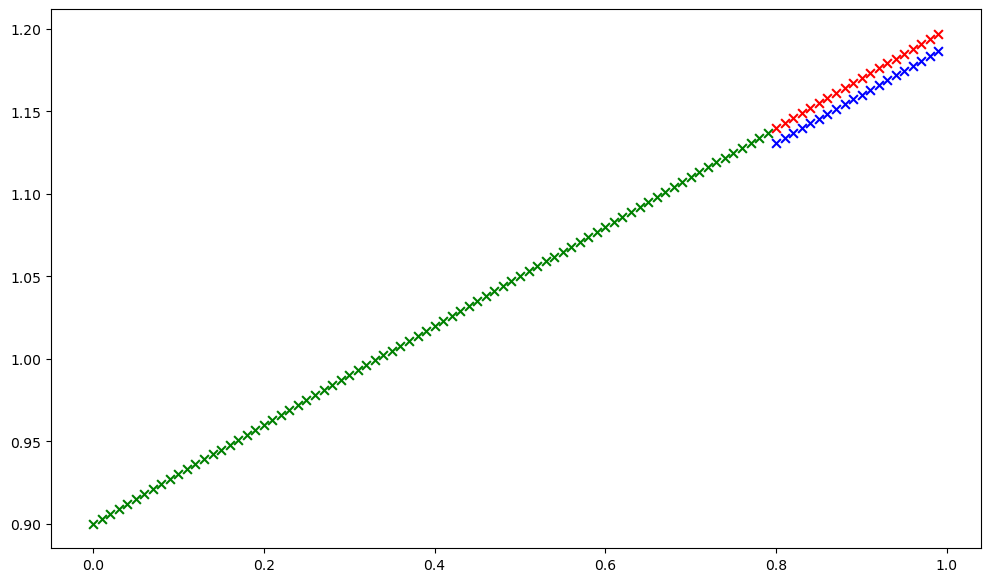

In [24]:
final_plot = plotting(X_train.cpu(),X_test.cpu(), y_train.cpu(), y_test.cpu(),prediction = final_pred.cpu())

In [21]:
X_train.device

device(type='mps', index=0)

In [25]:
#save the model
from pathlib import Path

#create models directory
model_path = Path('Models')
model_path.mkdir(parents = True, 
                 exist_ok = True)

#create model save path
model_name  = '01_PyTorch_model'
model_save_path = model_path/model_name

#save the dict
torch.save(obj = model_1.state_dict,
           f = model_save_path)